(sec:exercise-ogura)=
# 演習2 - 百人一首エージェントを作る

今回の演習では、小倉百人一首をプレイヤーAIを作成してみよう。ご存じの通り、小倉百人一首は、100種類の短歌からなる「かるた」の一種であり、読み札は短歌の上の句 (5・7・5の部分)であり、取り札が下の句(7・7の部分)である。

:::{note}

「かるた」とは、取り札を床の上に並べて、読み手が読んだ読み札に対応する取り札に一番早く触れた人が取り札を取るというゲームである。全ての読み札を読み終えた時点で最も多くの取り札をもっていた人が勝ちとなる。

:::

通常の小倉百人一種では、読み札には上の句と下の句の両方が漢字で書かれており、さらに挿絵がある。一方で取り札は下の句が濁点や半濁点を含まないひらがな48種類(「ゐ」と「ゑ」を含む)によって書かれている。

In [ ]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

rc = {"figure.dpi": 150}
sns.set_theme(style="white", rc=rc)
japanize_matplotlib.japanize()

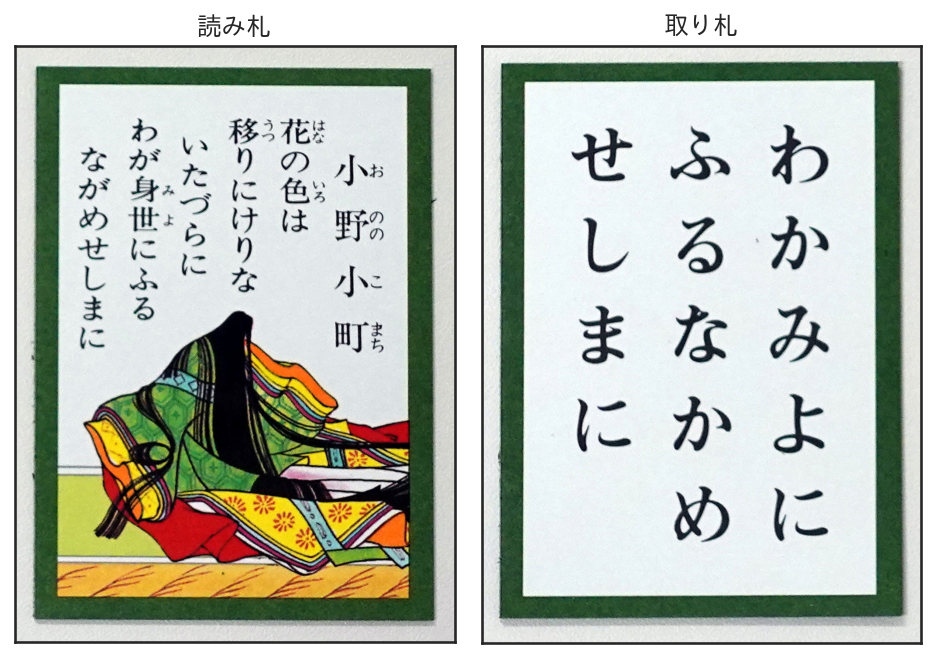

In [ ]:
yomi = cv2.imread("../../data/ogura/yomifuda.jpg", cv2.IMREAD_COLOR)
tori = cv2.imread("../../data/ogura/torifuda.jpg", cv2.IMREAD_COLOR)

fig = plt.figure()
gs = fig.add_gridspec(1, 2)

ax = plt.subplot(gs[0])
ax.imshow(yomi[:, :, ::-1])
ax.set(xticks=[], yticks=[], title="読み札")

ax = plt.subplot(gs[1])
ax.imshow(tori[:, :, ::-1])
ax.set(xticks=[], yticks=[], title="取り札")

plt.tight_layout()
plt.show()

百人一首では100枚の札のうち50枚だけを並べて、それを2人のプレイヤーによって取り合う。読み札は100枚全てを用いるので、「空札」といって、読まれたけれども50枚の取り札には含まれない札というのも存在する。

細かな百人一首のルールについては、以下の全日本かるた協会のウェブサイトを参考にしてほしい。

**はじめての競技かるた:** <https://www.karuta.or.jp/karuta/first-time/>

## 演習内容

今回の演習では、取り札が複数含まれた画像と、上の句を表す文字列の先頭数文字が与えられる。例えば、以下のような画像と文字列のペアが与えられる。

**入力画像 (実際に入力される画像はグレースケール画像):**

```{image} ../../data/ogura/level2.jpg
:align: left
:width: 60%
:class: float-none mb-3
```

**入力文字列:**

```
はなのいろは  
あさほらけ  
ほとときす
```

**正解出力:**

```
1
2
0
```

この入力に対して、各行のひらがなの列に対して、取り札が一つに決まり、なおかつ、その札が画像に含まれる場合には`1`を、与えられた文字列では札が決まらない場合は`2`を、対応する取り札が存在しない場合には`0`を返すようにする。

例えば、上の入力例では、「はなのいろは...」で始まる句は決まり字が3文字の「はなの」であり、なおかつ下の句である「わかみよにふる なかめせしまに」と書かれた札が画像に映っているので`1`が正解となる。

一方、2つめの「あさぼらけ」は2枚しかない6文字決まり字の札であり、「あさぼらけ ありあけのつきと...」に対応する下の句である「よしののさとに ふれるしらゆき」と、「あさぼらけ うじのかわぎり...」に対応する下の句である「あらはれわたる せせのあしろき」の両方が画像に含まれており、どちらの札を取れば良いかが決まらない。従って正解は`2`となる。

3つ目の「ほとどぎす」は1文字決まりの札であるため、対応する下の句が「たたありあけの つきそのこれる」になることは決定しているが、その下の句の札は画像中に存在しないため、正解は`0`となる。

これらを踏まえて、以下のような**画像 (image)** と **文字列の配列 (poems)** および問題のレベル (level)をとって、各和歌の決まりの状況を示す配列 (各要素は0-2)を返す以下の関数を実装すること。

```python
def solve(image: NDArray[np.uint8], poems: List[str], level: int) -> List[int]:
    """
    Inputs:
      image: input grayscale image
      poems: list of ogura poems
      level: difficulty level of this problem (1-3)
    Outputs:
      answer: list of determination status
        0: specific poem does not exist in the image
        1: the specific poem exist in the card, and there is no other possible poems
        2: possible poem can exist in the image, but there remains other possible poems
    """
    answer = [0] * len(poems)
    return answer
```

### 問題のレベル

今回の演習では、以下の3つのレベルの入力を用意している。なお全レベルにおいて、入力画像に写っている取り札の数と与えられる読み札の文字列の数は等しいものとする。

- **レベル1:** 画像に写っている取り札は1枚だけであり、読み札に対応する文字列も1つだけが与えられる。
- **レベル2:** 画像に写っている取り札は3枚以上、5枚以下であり、読み札に対応する文字列も3つ以上、5つ以下が与えられる。
- **レベル3:** 画像に写っている取り札は不特定多数であり、読み札に対応する文字列も不特性多数が与えられる。

これら、各レベルの入力が10枚ずつ与えられ、レベルに対応する点数、すなわちレベル1なら1点、レベル2なら2点、レベル3なら3点が、出力が完璧に正しい場合にのみ与えられる(したがって部分点はない)。実際に与えられる画像の例は以下の通り (なお、`solve`関数に渡される画像はグレースケール化されている)。

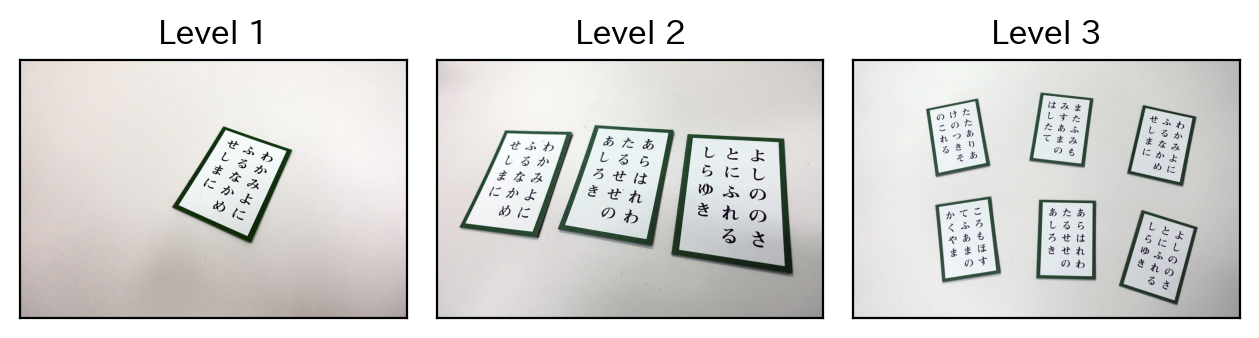

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

level1 = cv2.imread("../../data/ogura/level1.jpg")[:, :, ::-1]
level2 = cv2.imread("../../data/ogura/level2.jpg")[:, :, ::-1]
level3 = cv2.imread("../../data/ogura/level3.jpg")[:, :, ::-1]

fig = plt.figure(dpi=200)

a1 = level1.shape[1] / level1.shape[0]
a2 = level2.shape[1] / level2.shape[0]
a3 = level3.shape[1] / level3.shape[0]

# create subplots
gs = gridspec.GridSpec(1, 3, width_ratios=[a1, a2, a3])
p1 = plt.subplot(gs[0])
p2 = plt.subplot(gs[1])
p3 = plt.subplot(gs[2])

p1.imshow(level1)
p1.set(title="Level 1", xticks=[], yticks=[])

p2.imshow(level2)
p2.set(title="Level 2", xticks=[], yticks=[])

p3.imshow(level3)
p3.set(title="Level 3", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

### ローカル環境でのテスト

本番の採点は[GitHub Classroom](https://classroom.github.com/classrooms)を使って行う。講義中で課題用のClassroomのURLを指示するので、そのURLをブラウザで開き、テンプレート・レポジトリを自分のGitHubアカウントと紐付けること。

その後、レポジトリをcloneして、ローカル環境で`ogura.py`を編集してテストを実施する。まずは、各レベル5問ずつ練習データを提供するので、それを用いてテストを行うと良い。以下のURLからZIPファイルをダウンロードして、講義中に伝えるパスワードで展開して使うこと。

**サンプルファイル (各レベル5枚の計15枚)**
- <https://github.com/tatsy-classes/ogura-agent-template/raw/master/data/samples.zip>

また、百人一首の一覧を5,7,5,7,7の節ごとに区切ったリストを以下のURLにCSVファイルとして用意しているので、こちらも利用して良い。

**百人一首の一覧**
- <https://github.com/tatsy-classes/ogura-agent-template/raw/master/data/ogura.csv>

### 本番環境でのテスト

以後、課題用のレポジトリにコードをpushする度にテストが走る。本番環境では、一問(＝画像1枚)ごとに**最大実行時間を1分**に設定している。実行にそれ以上の時間がかかった場合、自動的にプログラムが終了されるので注意すること。

本講義では、実際の問題として与えている画像を公開することはしないが、どの程度の画像に対してプログラムが正しく動いているかは、Github Actionsのログを見ることで確認できる。

より詳細な課題作成の流れについてはテンプレート・レポジトリの[README.md](https://github.com/tatsy-classes/ogura-agent-template)を確認すること。

:::{admonition} 使用可能なライブラリ
:class: warning

今回の実行環境では、以下のライブラリが使用可能となっている (Pipを使ってインストールされる)。これ以外のライブラリは使用できないので注意すること。

- numpy
- scikit-learn
- matplotlib
- pandas
- opencv-python
- pytorch-cpu
- tensorflow
- keras

上記の通り、実行環境においてはCPUのみを用いるが、学習はGoogle Colab上などでGPUを用いて行っても良い。その場合、デバイスが学習環境と実行環境で異なるため、`torch.load`の引数に`map_location=...`を指定するのを忘れないようにすること。

また、本講義ではPyTorchの使用方法について解説したが、TensorFlowやKerasの方が使い方に慣れている場合は、そちらを用いても良い。ただ、その場合も**テスト環境ではCPUしか使うことができない**ことに注意すること。また、仮にPyTorch以外のライブラリを用いた場合に生じる問題については質問は受け付けないので、各自で解決すること。
:::

## プログラム作成のヒント

### 取り札の取り出しについて

[図形の検出](ssec:figure-from-photo)の節で説明した方法を用いて取り札に対応する四角形を取り出し、パースを除去することによって、取り札の画像が取得できる。

今回の演習では、数独の演習と異なり画像中に複数の取り札が含まれる。そのため`findContours`で取得した境界線について、それが取り札の輪郭なのか否かを判断する必要がある。ただし、入力画像には**取り札以外の余計なものは写っていない**ことが保証されているので、取り札の輪郭を認識することはそれほど難しくはないだろう。

### 決まり字について

小倉百人一首には、上の句にも下の句にも決まり字がある。一例として、

- はなのいろは うつりにけりな いたすらに わかみよにふる なかめせしまに

という句であれば、上の句の決まり字は「はなの」であり、下の句の決まり字は「わかみよ」である。

従って、厳密には、画像に写った読み札に書かれた文字全てを認識する必要はなく、札の右上の方に書かれた数文字だけを認識できれば十分である。もちろん、識別の精度は100%にはならないと思われるので、多めに文字を認識して、間違いがないようにする方が良い。

百人一首の各短歌について、決まり字が何文字になるかは前述の[百人一首リスト](https://github.com/tatsy-classes/ogura-agent-template/raw/master/data/ogura.csv)を使用してプログラム的に計算すると良い。

### ひらがなの認識について

今回の演習においては、札の向きは任意であるため、ひらがながどのような向きであっても認識できるように分類器を用意する、あるいは、正しい向きに取り札の画像を回転する処理のいずれかが必要になる。

ただ、取り札の上でひらがなが書かれている位置は、全ての札で共通なので、各文字が書かれている位置を判別する際には、その前提知識を用いると良い。

また、学習データセットの作成については、[数独の演習](sec:exercise-sudoku)で紹介したPillowの`ImageDraw`を用いる方法を用いれば良い。